# Logistic Regression
Used to predict categorical values (rather than continuous values)

In [156]:
# customer info
import random

X = [
    [35, 'M', 5000],
    [45, 'M', 8000],
    [28, 'F', 3500]
]
# did churn
y = [
    False,
    False,
    True
]

# The number of observations (rows)
num_rows = 100

for _ in range(num_rows):
    # Generate random values similar to the existing data
    age = random.randint(25, 60)
    gender = random.choice(['M', 'F'])
    
    income_initial = 10 * (age**2)
    prob_modifier = random.randint(1, 10)

    # Salary has a chance of being cut by 50%-75% (prevents a perfect positive correlation between age & salary)
    income = round(income_initial / ((prob_modifier % 3) + 1))

    # Append the new row to X
    X.append([age, gender, income])

    # Generate the corresponding y value, less likely if higher salary
    y.append((random.randint(1,income) < 4000))



In [157]:
import numpy as np

X = np.array(X) # Note that this array will be string type
y = np.array(y)

In [158]:
from sklearn.preprocessing import OneHotEncoder

In [159]:
# Perform the one-hot encoding
X_gender = X[:,1]
print(X_gender.shape)

X_gender = X_gender.reshape(-1, 1) # Reshape into a 2D array
print(X_gender.shape)

encoder = OneHotEncoder(sparse_output=False, dtype=int) # Ensure the results are 'int'
encoder.fit(X_gender)
print(encoder.categories_)

X_gender = encoder.transform(X_gender)

(103,)
(103, 1)
[array(['F', 'M'], dtype='<U11')]


In [160]:
# Two ways adding the econding gender values
# INSERT or HSTACK

# INSERT
X = np.insert(X[:,[0,2]], [1], X_gender, axis=1)
X = X.astype(int) # Ensure the array is int type no that there are no more string types in the array

# HSTACK
# X = np.hstack((X[:,[0,2]], X_gender))
print(X)

[[   35     0     1  5000]
 [   45     0     1  8000]
 [   28     1     0  3500]
 [   37     1     0 13690]
 [   34     1     0 11560]
 [   46     1     0  7053]
 [   35     0     1  6125]
 [   46     0     1  7053]
 [   40     1     0  8000]
 [   37     1     0  4563]
 [   47     1     0 11045]
 [   41     0     1  8405]
 [   35     0     1 12250]
 [   38     1     0 14440]
 [   41     1     0  8405]
 [   59     0     1 17405]
 [   38     0     1 14440]
 [   48     1     0 11520]
 [   38     0     1 14440]
 [   28     0     1  2613]
 [   56     1     0 31360]
 [   60     1     0 12000]
 [   40     1     0  8000]
 [   44     1     0  6453]
 [   36     0     1 12960]
 [   59     1     0 34810]
 [   53     1     0 28090]
 [   51     0     1  8670]
 [   39     1     0 15210]
 [   44     0     1  9680]
 [   37     1     0  4563]
 [   46     0     1 10580]
 [   57     1     0 16245]
 [   31     1     0  3203]
 [   29     1     0  4205]
 [   33     0     1  5445]
 [   42     0     1 17640]
 

In [161]:
# create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [162]:
# train model
model.fit(X, y)

LogisticRegression()

In [163]:
# make a prediction
new_input = np.array([[30, 'M', 15000]])

# encode gender
new_input_gender = new_input[:, 1].reshape(-1, 1)
new_input_gender = encoder.transform(new_input_gender)

# combine encoded gender with initial data using INSERT method, at index 1 (col 2) in between age and salary
new_input = np.insert(new_input[:, [0,2]], [1], new_input_gender, axis=1)
new_input = new_input.astype(int)
print(new_input)

[[   30     0     1 15000]]


In [164]:
pred = model.predict(new_input)

In [165]:
user_age = new_input[0,0]
user_gen = ("Male" if new_input[0,1] == 0 else "Female")
user_sal = new_input[0,3]
print(f"Will a {user_age} year old {user_gen} making ${user_sal} will churn?")
print(pred)

Will a 30 year old Male making $15000 will churn?
[False]


In [166]:
ticks = range(2000, 20000, 2000)
print(ticks)

range(2000, 20000, 2000)


## Plot the relation between salary & age and churn

1. Age has a mild positive correlation salary
2. Salary has a strong positive correlation on churn

As expected, since salary has a strong affect on churn, the higher the salary the less likely (black dot) to churn
Since age & salary have mild relation, age also affects  churn rate, however, as age increases, churn only slightly decreases

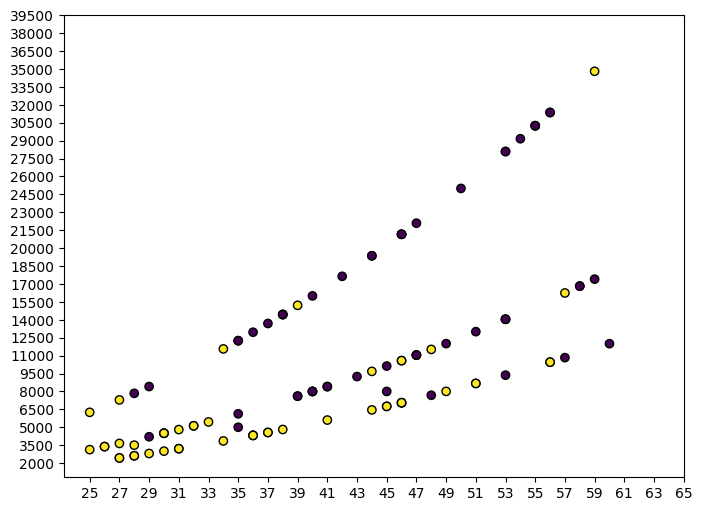

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], c=y, edgecolors='k')

plt.xticks(range(25, 66, 2))
plt.yticks(range(2000, 40000, 1500))


plt.show()